# Project 1

## Imports, etc.

In [2]:
from quantumsolver import fewnucleonEmulator
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Task 1

In [3]:
# Define the size of our mesh
NcD = 256 #256
NcE = 256 #256
k=3
cbar=1
Q=0.33

# Vectorized version of the fewnucleonEmulator
vfewnucleonEmulator = np.vectorize(fewnucleonEmulator)

In [4]:
# Create a 2-dimensional grid
# cD el [-2.5, 2.5]
# cE el [-1, 1]
cD = np.linspace(start=-2.5, stop=2.5, num=NcD)
cE = np.linspace(start=-1, stop=1, num=NcE)
cD_eval, cE_eval = np.meshgrid(cD,cE)
E4He_eval, Rp4He_eval, Rch4He_eval, E3He_eval, E3H_eval, E1A3H_eval, fT3H_eval = vfewnucleonEmulator(cD_eval, cE_eval)

In [11]:
# --- prior ---

def prior_multivariat(cD, cE):
    cD_eval, cE_eval = np.meshgrid(cD,cE)
    cDcE = np.stack((cD_eval, cE_eval), axis=-1)
    prior_dist = stats.multivariate_normal(mean=[0, 0], cov=[[25, 0], [0, 25]])
    prior = prior_dist.pdf(cDcE)
    return prior

def prior(cD, cE):
    prior_dist = stats.norm(0, 5)
    p1 = prior_dist.pdf(cD)
    p2 = prior_dist.pdf(cE)
    prior = np.outer(p2, p1)
    return prior

# --- likelihood ---

def likelihood(cD, cE, data, my, sigma):
    NcD = len(cD)
    NcE = len(cE)
    
    likelihood_dist = stats.norm(my, sigma)
    likelihood = likelihood_dist.pdf(data)
    return likelihood

# --- posterior ---

### TODO: Modify
def posterior(cD, cE, data, sigma):
    p=prior(cD, cE)*likelihood(cD, cE, data, sigma)
    norm=np.trapz(p,pH)
    return p/norm


In [14]:
pPrior = prior(cD, cE)

# --- Experimental data ---

# adopted sigma
sigma_E3H=0.015
sigma_E4He=0.005
sigma_Rp4He=0.0062
sigma_fT3H=3

# My
my_E3H=-8.482
my_E4He=-28.296
my_Rp4He=1.4552
my_fT3H=1129.6

pE3H = likelihood(cD, cE, E3H_eval, my=my_E3H, sigma=sigma_E3H)
pE4He = likelihood(cD, cE, E4He_eval, my=my_E4He, sigma=sigma_E4He)
pRp4He = likelihood(cD, cE, Rp4He_eval, my=my_Rp4He, sigma=sigma_Rp4He)
pfT3H = likelihood(cD, cE, fT3H_eval, my=my_fT3H, sigma=sigma_fT3H)

### Find a confidence interval

In [144]:
def ci(dist): 
    return None

### Reproduce plot 6a

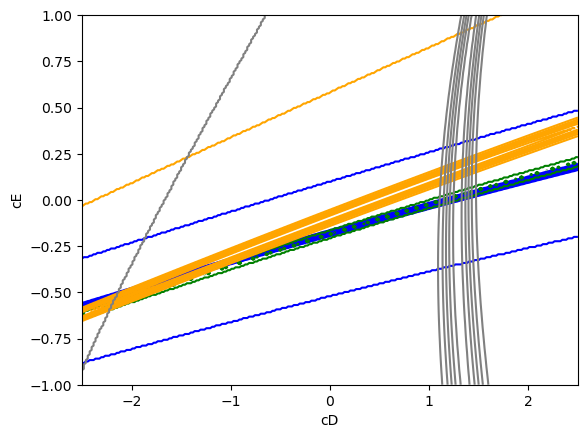

In [18]:
 # 6a)

# E4He_eval: blue
# E3H_eval: green
# Rp4He_eval: orange
# fT3H_eval: grey

plt.contour(cD_eval, cE_eval, pE3H*pPrior, colors="blue")
plt.contour(cD_eval, cE_eval, pE4He*pPrior, colors="green")
plt.contour(cD_eval, cE_eval, pRp4He*pPrior, colors="orange")
plt.contour(cD_eval, cE_eval, pfT3H*pPrior, colors="grey")

plt.xlabel('cD')
plt.ylabel('cE')

# Show the plot
plt.show()

---

- How dense grid can you use given that each model evaluation takes $\lesssim 1$ ms and you would probably not like to wait more than $\sim$ minutes?

In [327]:
# Assume 1 minute => 60 seconds => 60,000 ms ~ 2^16 => 256x256 dimension

- There might be useful utility code in Problem Set 2 for extracting contour levels for a PDF that is evaluated on a grid.

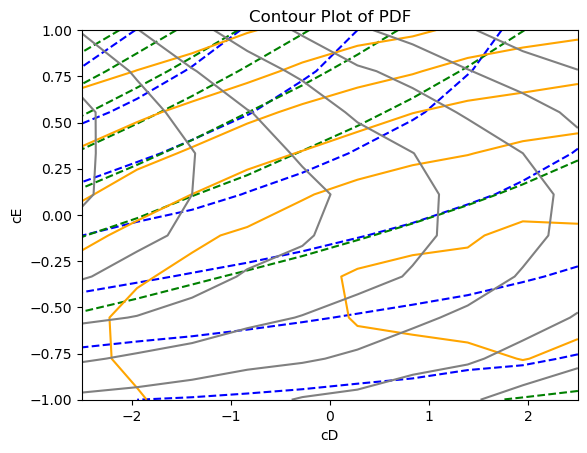

In [450]:
# E4He_eval: blue
# E3H_eval: green
# Rp4He_eval: orange
# fT3H_eval: grey

plt.contour(cD_eval, cE_eval, posterior_E3H, colors="blue")
plt.contour(cD_eval, cE_eval, posterior_E4He, colors="green")
plt.contour(cD_eval, cE_eval, posterior_Rp4He, colors="orange")
plt.contour(cD_eval, cE_eval, posterior_fT3H, colors="grey")

plt.xlabel('cD')
plt.ylabel('cE')
plt.title('Contour Plot of PDF')

# Show the plot
plt.show()

- How many data points would you naively need to infer two model parameters? If you were to combine the data that you have available, which set do you think works best for this inference problem?

## Task 2

## Task 3